In [117]:
pd.set_option('precision',2)

In [118]:
plt.rcParams['figure.figsize'] = (15,5)

tr = pd.read_csv('train.csv', parse_dates='Date', low_memory=False)
te = pd.read_csv('test.csv', parse_dates='Date', low_memory=False)
st = pd.read_csv('store.csv')

full = pd.concat([tr,te], axis=0)
full = pd.merge(full,st, on='Store').set_index('Date').sort_index()

idx = (full['Promo']==0)&(np.isnan(full['Id']))&(full['Open']==1)

In [198]:
store_sales = np.log(1+full[idx].set_index('Store', append=True)['Sales'].unstack('Store').dropna())

In [3]:
# store_sales.fillna(store_sales.mean(), inplace=True);

In [121]:
import scipy.cluster.hierarchy as hac
from collections import Counter

In [199]:
mat = store_sales.transpose().values
Z = hac.linkage(mat, method='complete', metric='euclidean')

In [217]:
cl_labels = hac.fcluster(Z, 2.5,criterion='distance')
Counter(cl_labels).most_common()

[(98, 51),
 (75, 47),
 (72, 45),
 (65, 44),
 (74, 42),
 (80, 41),
 (19, 40),
 (26, 34),
 (78, 32),
 (89, 32),
 (97, 32),
 (61, 28),
 (71, 28),
 (14, 27),
 (45, 27),
 (82, 27),
 (95, 23),
 (48, 20),
 (52, 20),
 (15, 19),
 (67, 19),
 (9, 18),
 (55, 18),
 (77, 17),
 (86, 17),
 (16, 16),
 (73, 15),
 (11, 14),
 (41, 14),
 (66, 13),
 (79, 13),
 (5, 12),
 (53, 12),
 (69, 12),
 (32, 11),
 (56, 11),
 (62, 11),
 (24, 10),
 (36, 9),
 (13, 8),
 (21, 8),
 (85, 8),
 (1, 7),
 (96, 7),
 (7, 6),
 (10, 6),
 (44, 6),
 (46, 6),
 (51, 6),
 (3, 5),
 (17, 5),
 (25, 5),
 (31, 5),
 (38, 5),
 (50, 5),
 (58, 5),
 (64, 5),
 (93, 5),
 (18, 4),
 (39, 4),
 (54, 4),
 (63, 4),
 (88, 4),
 (2, 3),
 (23, 3),
 (35, 3),
 (60, 3),
 (81, 3),
 (92, 3),
 (99, 3),
 (6, 2),
 (8, 2),
 (28, 2),
 (33, 2),
 (40, 2),
 (43, 2),
 (47, 2),
 (57, 2),
 (68, 2),
 (90, 2),
 (4, 1),
 (12, 1),
 (20, 1),
 (22, 1),
 (27, 1),
 (29, 1),
 (30, 1),
 (34, 1),
 (37, 1),
 (42, 1),
 (49, 1),
 (59, 1),
 (70, 1),
 (76, 1),
 (83, 1),
 (84, 1),
 (87, 1),
 

In [218]:
len(np.unique(cl_labels))

100

In [226]:
mask = cl_labels==68
hac.distance.pdist(store_sales.loc[:,mask].values.T, 'euclidean')

array([ 1.8023192])

In [180]:
store_sales.loc[:,mask].head(2)

Store,380,444,467,560
Date,,,,
2013-08-09,12120,11904,11500,10217
2013-08-10,11792,12777,11970,12977


In [222]:
store_sales.loc[:,mask].corr()

Store,535,623,1058
Store,,,
535,1.00,0.66,0.65
623,0.66,1.00,0.66
1058,0.65,0.66,1.00


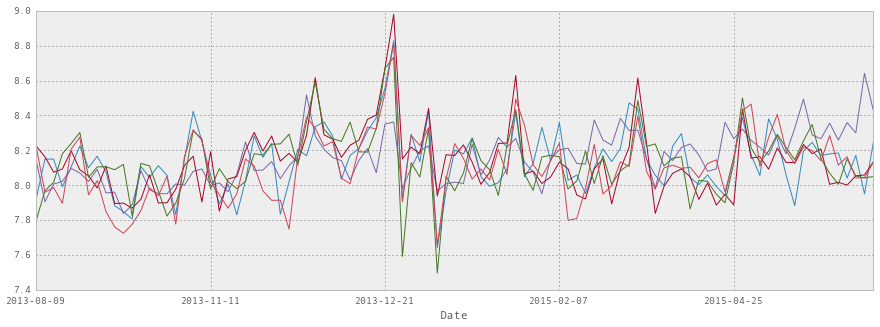

In [228]:
mask = cl_labels==50
store_sales.loc[:,mask].plot(legend=0);

In [115]:
cluster_labels = pd.DataFrame({'Store':store_sales.columns,'Cluster_1':cl_labels})